For this purpose i web scrapped the data from website yatra.com, collected the details of different flight providers as shown below from various sources to one common destination place. 
Prices collected are for duration of one week inorder to estimate or find the role of week day in the ticket fare

In [1]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
#reading the data
data= pd.read_csv('airlines.csv')

In [3]:
#viewing the data
data

,Unnamed: 0,airline,date_of_journey,departure_city,departure_time,reaching_time,stops,destination_city,journey_time,others,ticket fare
0,0,Go First,"Sun, 30 Jan",Hyderabad,20:05,01:20\n+ 1 day,1 Stop,Mumbai,5h 15m,Flight Details\neCash 250,"4,452"
1,1,Go First,"Sun, 30 Jan",Hyderabad,22:20,09:30\n+ 1 day,1 Stop,Mumbai,11h 10m,Flight Details\neCash 250,"4,452"
2,2,Go First,"Sun, 30 Jan",Hyderabad,20:05,07:50\n+ 1 day,1 Stop,Mumbai,11h 45m,Flight Details\neCash 250,"4,452"
3,3,IndiGo,"Sun, 30 Jan",Hyderabad,10:45,12:15,Non Stop,Mumbai,1h 30m,Flight Details\neCash 250,"4,453"
4,4,IndiGo,"Sun, 30 Jan",Hyderabad,08:30,10:05,Non Stop,Mumbai,1h 35m,Flight Details\neCash 250,"4,453"
...,...,...,...,...,...,...,...,...,...,...,...
2908,2908,Go First,"Sat, 5 Feb",New Delhi,09:15,18:10,1 Stop,Mumbai,8h 55m,Flight Details\neCash 250,"12,291"
2909,2909,Air India,"Sat, 5 Feb",New Delhi,10:55,08:20\n+ 1 day,1 Stop,Mumbai,21h 25m,Flight Details\nFree Meal\nEmissions: 371 Kg C...,"12,465"
2910,2910,SpiceJet,"Sat, 5 Feb",New Delhi,20:25,22:50,Non Stop,Mumbai,2h 25m,Flight Details\neCash 250,"13,200"
2911,2911,Go First,"Sat, 5 Feb",New Delhi,10:50,18:20,1 Stop,Mumbai,7h 30m,Flight Details\neCash 250,"16,245"


There are 2913 rows with 11 columns

In [4]:
#Viewing the basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2913 non-null   int64 
 1   airline           2913 non-null   object
 2   date_of_journey   2913 non-null   object
 3   departure_city    2913 non-null   object
 4   departure_time    2913 non-null   object
 5   reaching_time     2913 non-null   object
 6   stops             2913 non-null   object
 7   destination_city  2913 non-null   object
 8   journey_time      2913 non-null   object
 9   others            2913 non-null   object
 10  ticket fare       2913 non-null   object
dtypes: int64(1), object(10)
memory usage: 250.5+ KB


In [5]:
#Making instance of data
df=data.copy(deep=True)

In [6]:
#Drop unnecessary columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.columns

Index(['airline', 'date_of_journey', 'departure_city', 'departure_time',
       'reaching_time', 'stops', 'destination_city', 'journey_time', 'others',
       'ticket fare'],
      dtype='object')

In [8]:
#changing data type of ticket fare
price=[]
for i in df['ticket fare']:
    price.append(i.replace(',',''))
df['price']=price

In [9]:
df['price']=df['price'].astype(int)

In [10]:
#In column date of journey, we need only week day details, split the column 
df[['day','date']]=df['date_of_journey'].str.split(r',',expand=True)

In [11]:
#Dropping the columns fare, date_of_journey
df.drop(['ticket fare','date_of_journey'],axis=1,inplace=True)

In [12]:
#splitting the journey time into hours & minutes columns
df[['hours','minutes']]=df['journey_time'].str.split(' ',expand=True)

In [13]:
#Replacing the h in hours column and converting into minutes
df['hours']=df['hours'].str.replace('h','').astype(int)*60

In [14]:
#Replacing the m in minutes column
df['minutes']=df['minutes'].str.replace('m','').astype(int)

In [15]:
#Calculating the total time in minutes
df['duration_in_min']=df['hours']+df['minutes']

In [16]:
df.columns

Index(['airline', 'departure_city', 'departure_time', 'reaching_time', 'stops',
       'destination_city', 'journey_time', 'others', 'price', 'day', 'date',
       'hours', 'minutes', 'duration_in_min'],
      dtype='object')

In [17]:
#Dropping the columns journey_time, hours, minutes
df.drop(['journey_time','hours','minutes'],axis=1,inplace=True)

In [18]:
#Splitting the departure time
df[['departure_hour','departure_min']] = df['departure_time'].str.split(':',expand=True).astype(int)

we splitted the the departure times, inorder to find which part of day prices are high. 

In [19]:
#Drop the column departure min, reaching time
df.drop(['departure_min','departure_time','reaching_time'],axis=1,inplace=True)

In [20]:
#categorising the day based on the hour of departure
day_category = []
for i in df['departure_hour']:
    if i in range(0,7):
        category='Early Hours'
        day_category.append(category)
    elif i in range(7,13):
        category='Morning'
        day_category.append(category)
    elif i in range(13,19):
        category='Afternoon'
        day_category.append(category)
    else:
        category='Evening'
        day_category.append(category)
day_category
        

['Evening',
 'Evening',
 'Evening',
 'Morning',
 'Morning',
 'Morning',
 'Evening',
 'Evening',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Early Hours',
 'Early Hours',
 'Early Hours',
 'Early Hours',
 'Afternoon',
 'Evening',
 'Evening',
 'Evening',
 'Evening',
 'Morning',
 'Afternoon',
 'Morning',
 'Evening',
 'Afternoon',
 'Morning',
 'Evening',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Evening',
 'Afternoon',
 'Evening',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Early Hours',
 'Evening',
 'Afternoon',
 'Evening',
 'Afternoon',
 'Early Hours',
 'Evening',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Early Hours',
 'Early Hours',
 'Early Hours',
 'Morning',
 'Morning',
 'Morning',
 'Early Hours',
 'Morning',
 'Afternoon',
 'Morning',


In [21]:
#New column in data frame having the category of day
df['day slot']=day_category

In [22]:
#Drop the column departure hour
df.drop('departure_hour',axis=1,inplace=True)

we made all the required main modifications, let us see the info now and change remaining while exploring deep

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   airline           2913 non-null   object
 1   departure_city    2913 non-null   object
 2   stops             2913 non-null   object
 3   destination_city  2913 non-null   object
 4   others            2913 non-null   object
 5   price             2913 non-null   int32 
 6   day               2913 non-null   object
 7   date              2913 non-null   object
 8   duration_in_min   2913 non-null   int32 
 9   day slot          2913 non-null   object
dtypes: int32(2), object(8)
memory usage: 204.9+ KB


Air India    1100
Vistara       709
IndiGo        575
Go First      464
SpiceJet       65
Name: airline, dtype: int64


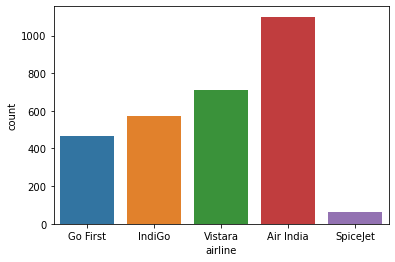

In [24]:
#Details of airlines
sns.countplot(df['airline'])
print(df['airline'].value_counts())

We have data of 5 different service providers as shown above. Air india having the major flights and spice jet least

Bangalore    774
New Delhi    663
Hyderabad    567
Chennai      527
Goa          382
Name: departure_city, dtype: int64

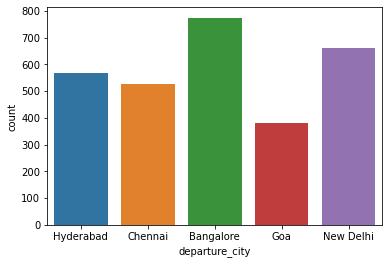

In [25]:
#Exploring departure city column
sns.countplot(df['departure_city'])
df['departure_city'].value_counts()

our data has more filghts from banglore & least flights from goa

In [26]:
#viewing stops column
df['stops'].value_counts()

1 Stop       1573
2 Stop(s)     635
Non Stop      557
3 Stop(s)     144
4 Stop(s)       4
Name: stops, dtype: int64

majority of flights have 1 stop and only 4 flights have 4 stops in between the source and destination

In [27]:
stops = []
for i in df['stops']:
    if i == '1 Stop':
        j=1
    elif i == '2 Stop(s)':
        j=2
    elif i == 'Non Stop':
        j=0
    elif i == '3 Stop(s)':
        j=3
    elif i == '4 Stop(s)':
        j=4
    
    stops.append(j)
    
df['stops']=stops
df['stops'].value_counts()

1    1573
2     635
0     557
3     144
4       4
Name: stops, dtype: int64

now we changed the column into int format as required by assigning numerical values

In [28]:
#Destination city
df['destination_city'].value_counts()

Mumbai    2913
Name: destination_city, dtype: int64

In [29]:
#viewing others column
df['others']

0                               Flight Details\neCash 250
1                               Flight Details\neCash 250
2                               Flight Details\neCash 250
3                               Flight Details\neCash 250
4                               Flight Details\neCash 250
                              ...                        
2908                            Flight Details\neCash 250
2909    Flight Details\nFree Meal\nEmissions: 371 Kg C...
2910                            Flight Details\neCash 250
2911                            Flight Details\neCash 250
2912                            Flight Details\neCash 250
Name: others, Length: 2913, dtype: object

In [30]:
#split the column
df[['details','meal_provision','emission','ecash']]=df['others'].str.split('\n',expand=True)

In [31]:
#viewing the details column
df['details'].value_counts()

Flight Details    2913
Name: details, dtype: int64

In [32]:
#drop the column details
df.drop('details',axis=1,inplace=True)

In [33]:
#drop the column others
df.drop('others',axis=1,inplace=True)

In [34]:
#View meal details
df['meal_provision'].value_counts()

Free Meal                1185
eCash 250                1050
No Meal Fare              624
Emissions: 109 Kg CO2      41
Emissions: 142 Kg CO2      13
Name: meal_provision, dtype: int64

In [40]:
meal=[]
for i in df['meal_provision']:
    if i=='Free Meal' or i=='No Meal Fare':
        j='Free Meal'
    else:
        j='Paid Meal'
    
    meal.append(j)
    
df['meal_provision']=meal

Free Meal    1809
Paid Meal    1104
Name: meal_provision, dtype: int64

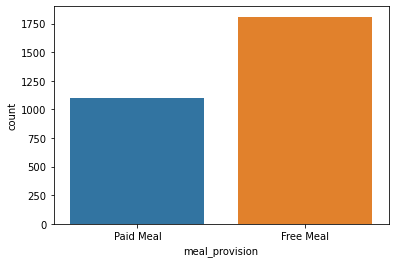

In [41]:
sns.countplot(df['meal_provision'])
df['meal_provision'].value_counts()

we can see most of the flights providing the free meal

In [42]:
#dropping other columns 
df.drop(['emission','ecash'],axis=1,inplace=True)

Sat    1328
Wed     470
Fri     451
Thu     437
Tue      85
Mon      74
Sun      68
Name: day, dtype: int64

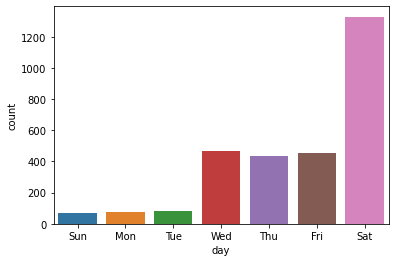

In [45]:
#Day column
sns.countplot(df['day'])
df['day'].value_counts()

data we had consists of flights more on saturday and least on sunday

In [47]:
#Viewing the column date
df['date'].value_counts()

 5 Feb     1328
 2 Feb      470
 4 Feb      451
 3 Feb      437
 1 Feb       85
 31 Jan      74
 30 Jan      68
Name: date, dtype: int64

In [53]:
x=df['date'].str.split(' ',expand=True)
x

,0,1,2
0,,30,Jan
1,,30,Jan
2,,30,Jan
3,,30,Jan
4,,30,Jan
...,...,...,...
2908,,5,Feb
2909,,5,Feb
2910,,5,Feb
2911,,5,Feb


In [57]:
#Considering only date
df['date']=x[1]

Morning        1034
Afternoon       852
Evening         555
Early Hours     472
Name: day slot, dtype: int64

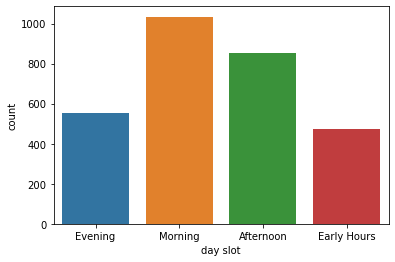

In [59]:
#day slot 
sns.countplot(df['day slot'])
df['day slot'].value_counts()

very few flights in early hours compared to other times

In [58]:
df.columns

Index(['airline', 'departure_city', 'stops', 'destination_city', 'price',
       'day', 'date', 'duration_in_min', 'day slot', 'meal_provision'],
      dtype='object')

## Analysing price trends wrt to other factors

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Go First'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet')])

<Figure size 1296x1296 with 0 Axes>

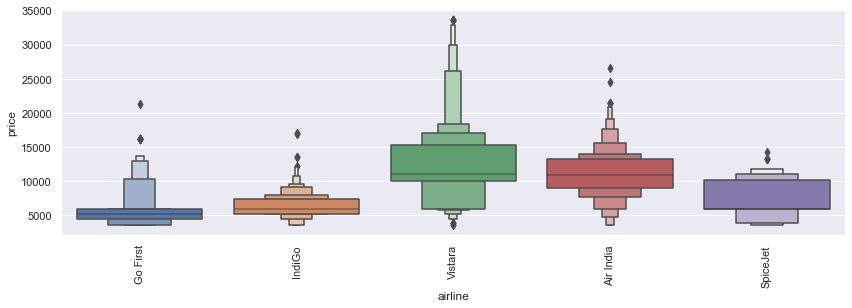

In [61]:
sns.set()
plt.figure(figsize=(18,18))
sns.catplot(x='airline', y='price',data=df,kind='boxen', height=4,aspect=3)
plt.xticks(rotation=90)

Based on provider, vistara is charging highest price

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Go First'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet')])

<Figure size 1296x1296 with 0 Axes>

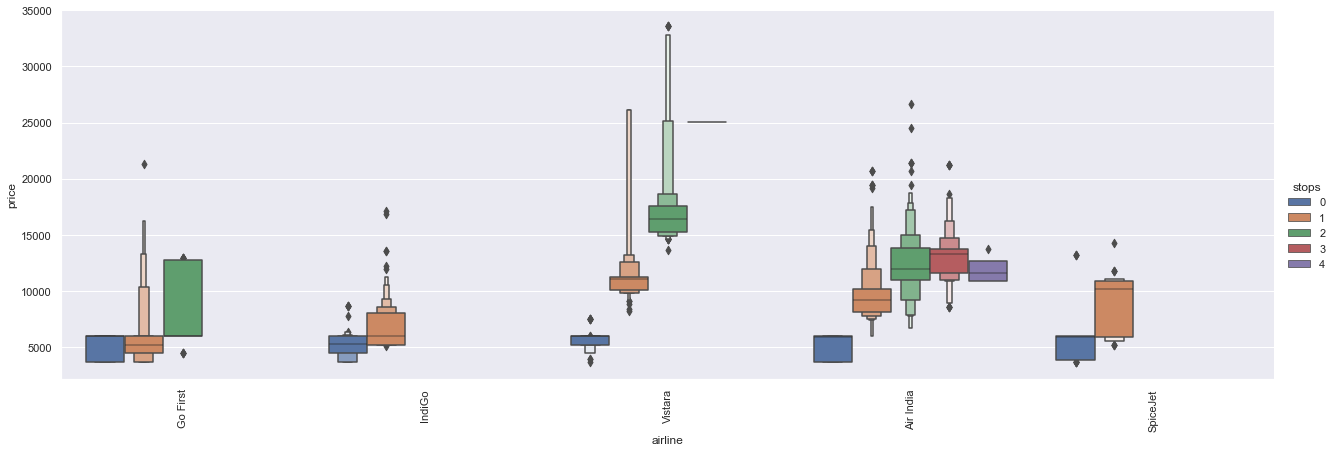

In [64]:
sns.set()
plt.figure(figsize=(18,18))
sns.catplot(x='airline', y='price',data=df,hue='stops',kind='boxen', height=6,aspect=3)
plt.xticks(rotation=90)

From above we can see, with increase in stops, price also increases. 
Only air india had 3 & 4 stops

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Go First'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet')])

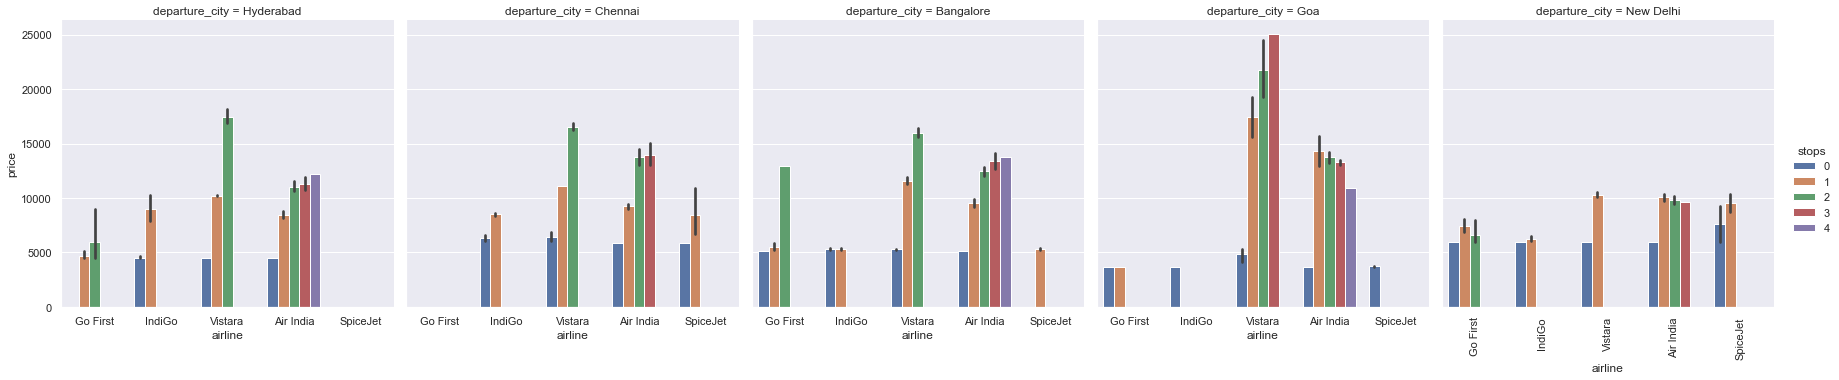

In [68]:
sns.set()
sns.catplot(x='airline', y='price',data=df,hue='stops',col='departure_city',kind='bar')
plt.xticks(rotation=90)

In [ ]:
Observations:
    No spice jet flights from Hydeabad to Mumbai
    Air india have flights with 0 stops to 4 stops in between. With less fare for flight with 0 stops.
    Vistara is charging highest fare from any city, any no. of stops compared to other providers

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Go First'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet')])

<Figure size 1800x1800 with 0 Axes>

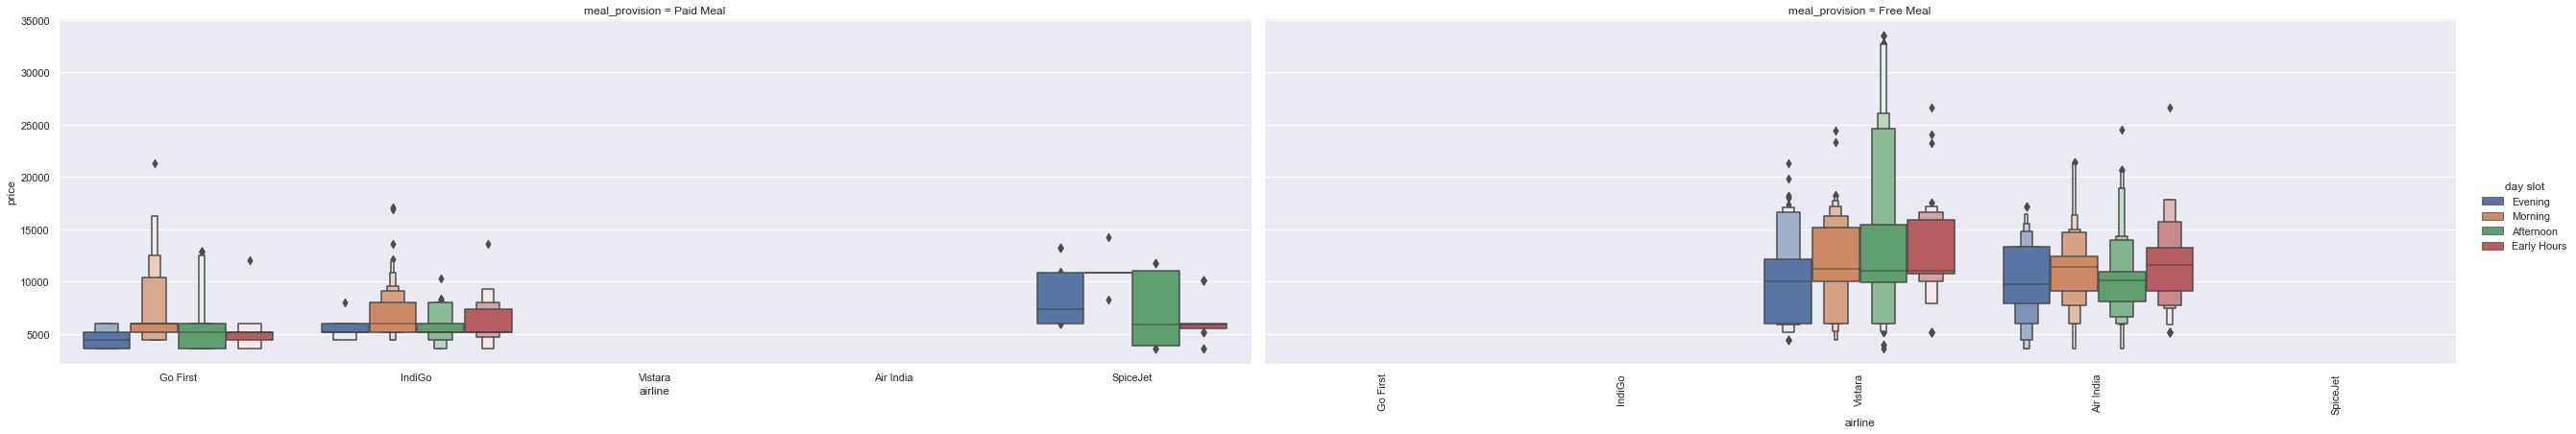

In [71]:
sns.set()
plt.figure(figsize=(25,25))
sns.catplot(x='airline', y='price',data=df,hue='day slot',col='meal_provision',kind='boxen', height=6,aspect=3)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Evening'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Early Hours')])

<Figure size 1800x1800 with 0 Axes>

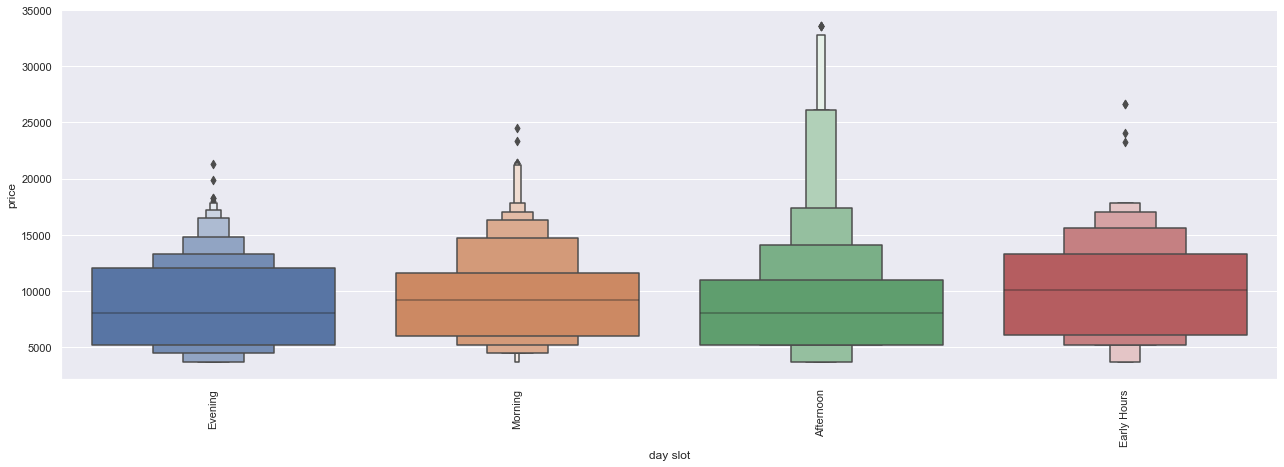

In [135]:
sns.set()
plt.figure(figsize=(25,25))
sns.catplot(x='day slot', y='price',data=df,kind='boxen', height=6,aspect=3)
plt.xticks(rotation=90)

In [ ]:
We can observe 50% of flight fares are higher in early hours  & morining

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

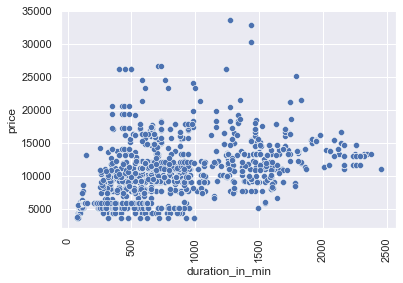

In [77]:
sns.set()
sns.scatterplot(x='duration_in_min', y='price',data=df)
plt.xticks(rotation=90)

There is no standard relation or inference, with increase in duration, price also increases. Wrt to stops , journey time will also increase

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

<Figure size 1800x1800 with 0 Axes>

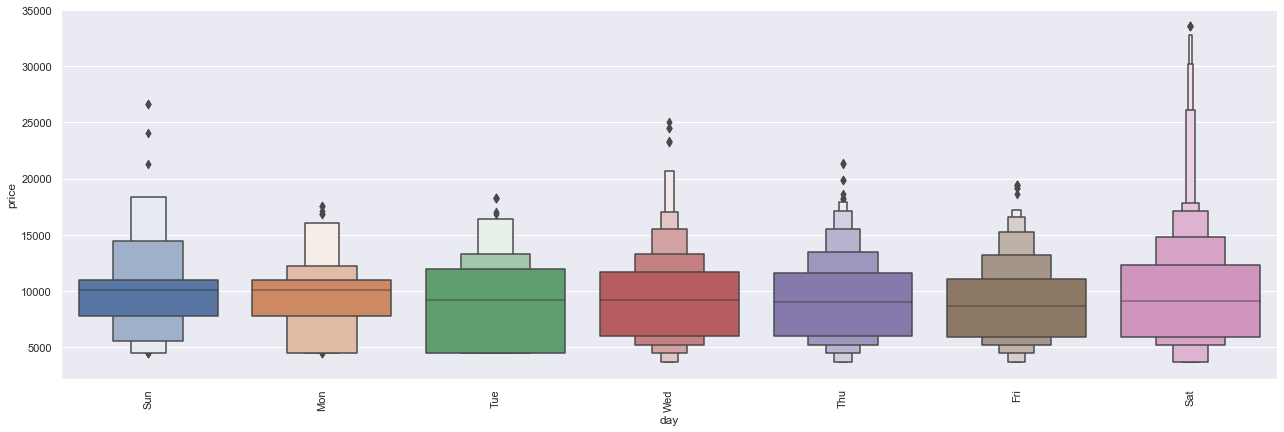

In [86]:
sns.set()
plt.figure(figsize=(25,25))
sns.catplot(x='day', y='price',data=df,kind='boxen', height=6,aspect=3)
plt.xticks(rotation=90)

Prices of tickets are higher on saturday and on mid of week, and last moment bookings.

In [87]:
df.columns

Index(['airline', 'departure_city', 'stops', 'destination_city', 'price',
       'day', 'date', 'duration_in_min', 'day slot', 'meal_provision'],
      dtype='object')

In [88]:
df_new=df.copy(deep=True)

In [89]:
#Encoding the columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

col=df.select_dtypes(include='object')
for i in col:
    df_new[i]=le.fit_transform(df[i])
    
df_new.head(5)

,airline,departure_city,stops,destination_city,price,day,date,duration_in_min,day slot,meal_provision
0,1,3,1,0,4452,3,3,315,2,1
1,1,3,1,0,4452,3,3,670,2,1
2,1,3,1,0,4452,3,3,705,2,1
3,2,3,0,0,4453,3,3,90,3,1
4,2,3,0,0,4453,3,3,95,3,1


In [91]:
df_new.nunique()

airline               5
departure_city        5
stops                 5
destination_city      1
price               264
day                   7
date                  7
duration_in_min     284
day slot              4
meal_provision        2
dtype: int64

In [92]:
#Brief stats
df_new.describe()

,airline,departure_city,stops,destination_city,price,day,date,duration_in_min,day slot,meal_provision
count,2913.000000,2913.000000,2913.000000,2913.0,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,1.594576,1.937521,1.129763,0.0,9311.452798,2.721250,4.142465,713.223481,1.607964,0.378991
std,1.581811,1.531562,0.776313,0.0,4406.497225,1.895597,2.121796,535.957146,1.238449,0.485219
min,0.000000,0.000000,0.000000,0.0,3635.000000,0.000000,0.000000,70.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.0,5954.000000,2.000000,2.000000,320.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.0,9141.000000,2.000000,5.000000,595.000000,2.000000,0.000000
75%,3.000000,3.000000,2.000000,0.0,11545.000000,4.000000,6.000000,930.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,0.0,33562.000000,6.000000,6.000000,2455.000000,3.000000,1.000000


In [93]:
#Viewing the skewness
df_new.skew()

airline             0.480063
departure_city      0.041419
stops               0.476294
destination_city    0.000000
price               1.294229
day                 0.430010
date               -0.583886
duration_in_min     0.967974
day slot           -0.149370
meal_provision      0.499125
dtype: float64

Skewness is in acceptable range

In [97]:
#Drop destination city
df_new.drop('destination_city',axis=1,inplace=True)

<AxesSubplot:>

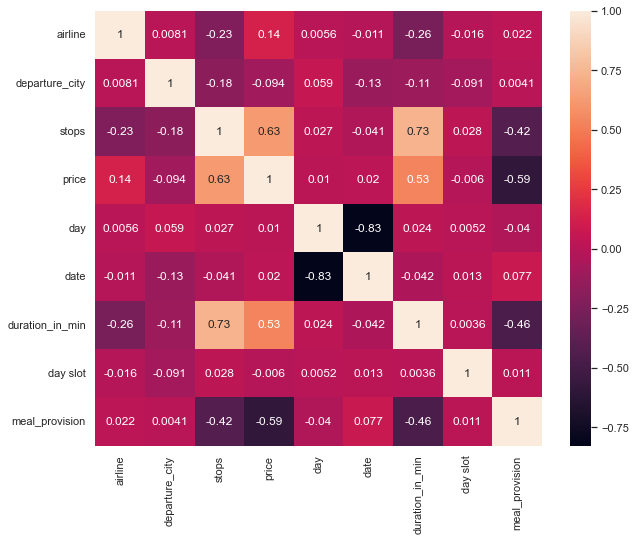

In [98]:
#Visualise the relation
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(), annot=True)

In [99]:
df_new.drop(['day','duration_in_min'],axis=1,inplace=True)

In [100]:
df_new.columns

Index(['airline', 'departure_city', 'stops', 'price', 'date', 'day slot',
       'meal_provision'],
      dtype='object')

In [101]:
#Splitting the features and target
x=df_new.drop('price',axis=1)
y=df_new['price']

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [110]:
#Finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
r2=0
rs=0
sc=0
sc1=0
lr=LinearRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    score1=lr.score(x_test,y_test)
    pred=lr.predict(x_test)
    r2s=r2_score(y_test,pred)
    if r2s>r2:
        r2=r2s
        rs=i
        sc=score
        sc1=score1
print(f'Best r2 socre: {r2} \nat random state {rs}\ntrain score is {sc}\ntest score is {sc1}')
    

Best r2 socre: 0.66413774687561 
at random state 360
train score is 0.5725048777593638
test score is 0.66413774687561


We can see there is some difference between train & test scores, so there is problem of overfit or underfit

In [111]:
#Splitting the data at best random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=360)

In [106]:
#Importing diferent models to predict
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold

In [112]:
models=[LinearRegression(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'r2 score of {m}:', r2_score(y_test,predm))
    cvscore=cross_val_score(m,x_scaled,y, cv=5)
    print(f'mean cv score of {m}:',cvscore.mean())
    print('\n')

r2 score of LinearRegression(): 0.66413774687561
mean cv score of LinearRegression(): 0.43708967663692083


r2 score of SVR(): 0.04931935885740746
mean cv score of SVR(): -0.07018939435100184


r2 score of DecisionTreeRegressor(): 0.8294312663043426
mean cv score of DecisionTreeRegressor(): 0.2024565916754934


r2 score of RandomForestRegressor(): 0.8616262360248189
mean cv score of RandomForestRegressor(): 0.316497938942874


r2 score of GradientBoostingRegressor(): 0.8200925820933807
mean cv score of GradientBoostingRegressor(): 0.4576541896485054




we can see linear regression is giving the best, compared to other models

In [113]:
lr= LinearRegression()
lr.fit(x_train,y_train)
predm=lr.predict(x_test)
print(f'r2 score:', r2_score(y_test,predm))
print('mean squared error:',mean_squared_error(y_test,predm))

r2 score: 0.66413774687561
mean squared error: 5797376.894125692


The model is only 66% accurate.

<AxesSubplot:xlabel='price', ylabel='Density'>

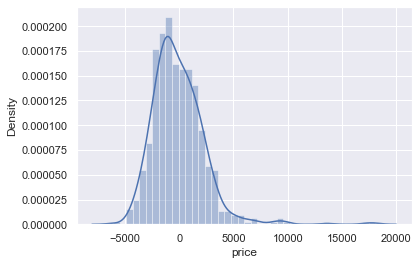

In [115]:
sns.distplot(y_test-predm)

<AxesSubplot:xlabel='price'>

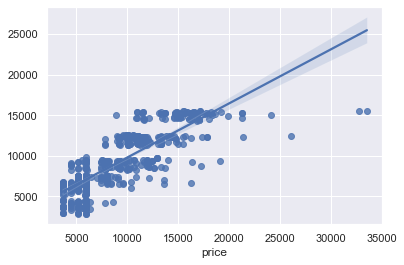

In [116]:
sns.regplot(y_test,predm)

In [117]:
#saving the model
import pickle
file=open('Flight_fare.pkl','wb')
pickle.dump(lr,file)

model is saved successfully

In [134]:
x.columns

Index(['airline', 'departure_city', 'stops', 'date', 'day slot',
       'meal_provision'],
      dtype='object')

These are the inputs to be given to model to predict price. By default destination city is assumed to be mumbai.